<a href="https://colab.research.google.com/github/RinayGajjar/ML-Stuff/blob/main/PolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

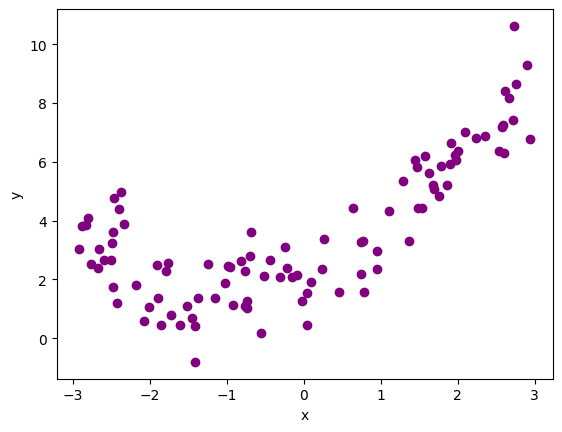

In [20]:
##for polynomial graph we need to create points of quadratic equation to form a non linear data points
x=6 * np.random.rand(100, 1) - 3##this is the random values taken from numpy
y = 0.5 * x**2 + x + 2 + np.random.randn(100, 1)##this is the quadratic equation 0.5x^2 + x + 2 + outliers
plt.scatter(x, y,color='purple')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=True)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train_poly, y_train)

LinearRegression()

In [16]:
from sklearn.metrics import r2_score
y_pred = lin_reg.predict(x_test_poly)
print(r2_score(y_test, y_pred))

0.9079265432277406


In [21]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[0.         0.95153305 0.50927492]]
[1.98087]


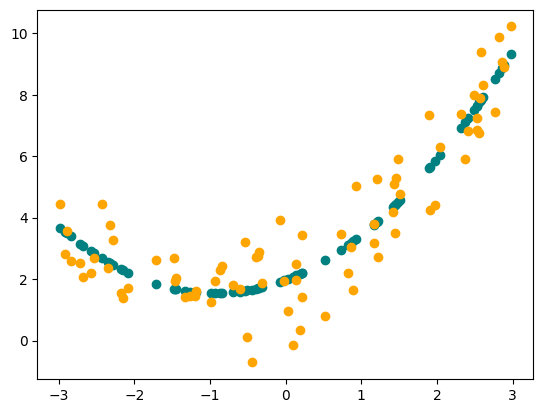

In [25]:
plt.scatter(x_train,lin_reg.predict(x_train_poly),color='teal')
plt.scatter(x_train,y_train,color='orange')

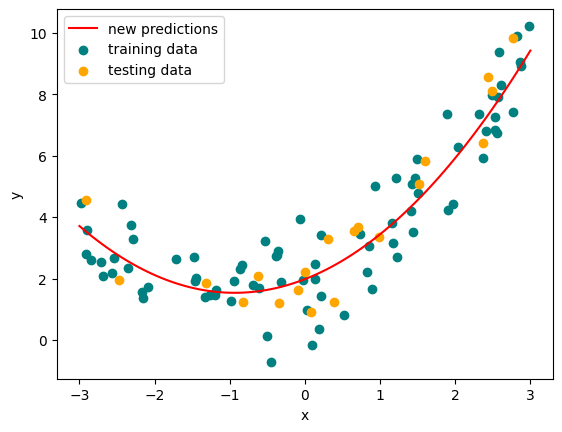

In [31]:
#testing new points
x_new = np.linspace(-3, 3, 100).reshape(100, 1)
x_new_poly = poly_features.transform(x_new)
y_new =  lin_reg.predict(x_new_poly)
#plt.scatter(x, y,color='purple')
plt.plot(x_new,y_new,color='red',label='new predictions')
plt.scatter(x_train,y_train,color='teal',label='training data')
plt.scatter(x_test,y_test,color='orange',label='testing data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()